### Imports

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import joblib
import os



In [ ]:
# Load df
df = pd.read_csv('https://raw.githubusercontent.com/FlorianMuehlbauer24/Final-Project-Bart-Flo/main/df_ml.csv')

## Split into train and test set

In [ ]:
X = df.drop(columns = ["is_canceled"]) # drop everything but y variable
y = df[["is_canceled"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Downsampling

In [ ]:
# Concatenate the training data
train_data = pd.concat([X_train, y_train], axis=1)

# Separate classes
not_canceled = train_data[train_data["is_canceled"] == 0]
canceled = train_data[train_data["is_canceled"] == 1]

not_canceled_downsampled = resample(not_canceled, replace=False, n_samples=len(canceled), random_state=42)

downsampled_data = pd.concat([not_canceled_downsampled, canceled])

# Separate X and y again
X_train_downsampled = downsampled_data.drop(columns=["is_canceled"])
y_train_downsampled = downsampled_data["is_canceled"]

### Scaling

In [ ]:
# StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_downsampled)
X_test_scaled = scaler.transform(X_test)



### Logistic Regression

In [ ]:
# Apply Logistic Regression
logr = LogisticRegression(max_iter=1000) # max_iter defines the maximum of iterations
logr.fit(X_train_scaled, y_train_downsampled)

# Prediction on the scaled test set
y_pred_logr = logr.predict(X_test_scaled)

# Evaluation of the model
acc_lr = accuracy_score(y_test, y_pred_logr)
print(f"Accuracy Score of Logistic Regression is: {acc_lr}")

Accuracy Score of Logistic Regression is: 0.8107312560447416


In [ ]:
# Calculate accuracy, precision, recall
accuracy = accuracy_score(y_test, y_pred_logr)
precision = precision_score(y_test, y_pred_logr)
recall = recall_score(y_test, y_pred_logr)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8107312560447416
Precision: 0.7322785468928906
Recall: 0.784805890227577


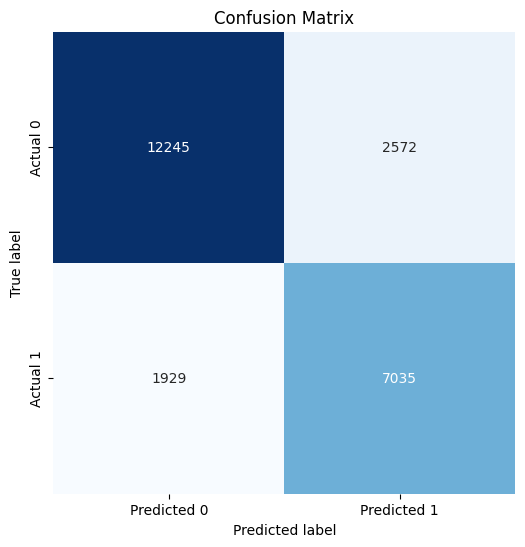

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_logr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()

## KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train_downsampled)
y_pred_knn = knn.predict(X_test_scaled)

# Calculate accuracy, precision, recall
acc_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)

In [ ]:
print("Accuracy Score of KNN is:", acc_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)

Accuracy Score of KNN is: 0.8263739960472646
Precision: 0.7353256108244914
Recall: 0.8427041499330656


In [ ]:
# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - KNN')

plt.show()

In [ ]:
# grid search -> determines numer of neighbors
knn_clf = KNeighborsClassifier()

param_grid = {"n_neighbors" : [3,5,6,8,10,15]}

In [ ]:
## grid_search = GridSearchCV(knn_clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)
# Takes around 30 minutes to calculate

In [ ]:
## grid_search.fit(X_train_scaled,y_train_downsampled)

In [ ]:
best_params = grid_search.best_params_ #To check the best set of parameters returned
best_params

In [ ]:
# Optimal number of Neighbors : 5

### Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train_downsampled)

y_pred_decision_tree = decision_tree.predict(X_test_scaled)

In [ ]:
# Calculate accuracy, precision, recall
acc_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)

# Evaluation metrics
print("Accuracy Score of Decision Tree is:", acc_decision_tree)
print("Precision:", precision_decision_tree)
print("Recall:", recall_decision_tree)

Accuracy Score of Decision Tree is: 0.848955048147681
Precision: 0.7706024581906106
Recall: 0.8533020972780009


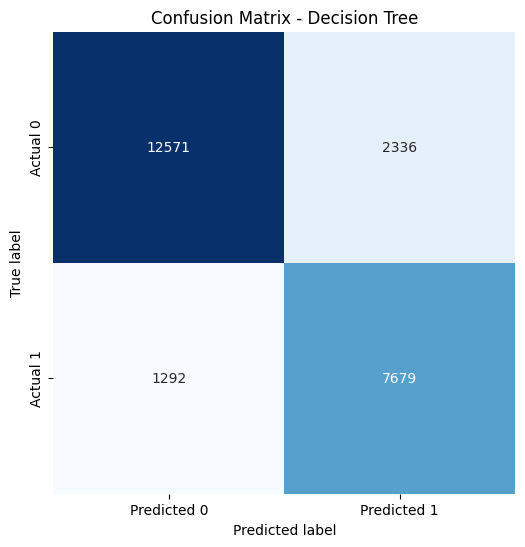

In [ ]:
# Confusion Matrix
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_decision_tree, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Decision Tree')

plt.show()

### Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train_downsampled)

y_pred_random_forest = random_forest.predict(X_test_scaled)

In [ ]:
# Calculate accuracy, precision, recall
acc_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)

print("Accuracy Score of Random Forest is:", acc_random_forest)
print("Precision:", precision_random_forest)
print("Recall:", recall_random_forest)

Accuracy Score of Random Forest is: 0.8943274042302679
Precision: 0.8513999346334024
Recall: 0.8718206157965194


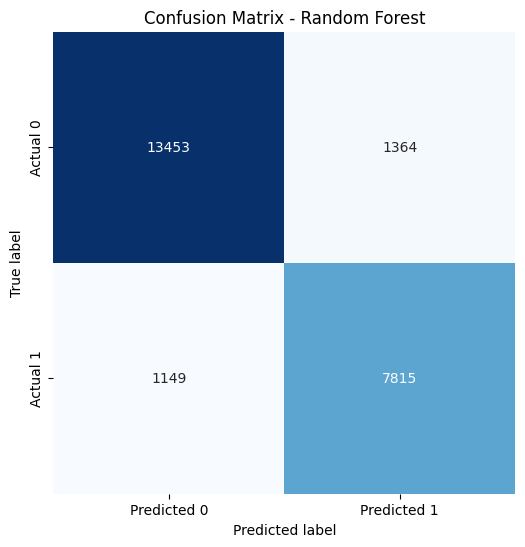

In [ ]:
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_random_forest, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Random Forest')

plt.show()

### Cross Validation

Recall: Out of all the actual positive instances in the dataset, how many did the model correctly identify?

In [ ]:
#Logistic Regression
cross_val_lr = cross_val_score(logr, X_train_scaled, y_train_downsampled, cv=5, scoring='recall')
print(f"Cross-Validation Recall for Logistic Regression: {np.mean(cross_val_lr)}")

Cross-Validation Recall for Logistic Regression: 0.7822595939814382


In [ ]:
#KNN
cross_val_knn = cross_val_score(knn, X_train_scaled, y_train_downsampled, cv=5, scoring='recall')
print(f"Cross-Validation recall for KNN: {np.mean(cross_val_knn)}")

Cross-Validation recall for KNN: 0.8387937247470557


In [ ]:
# Decision Trees
cross_val_dt = cross_val_score(decision_tree, X_train_scaled, y_train_downsampled, cv=5, scoring='recall')
print(f"Cross-Validation Recall for Decision Tree: {np.mean(cross_val_dt)}")

Cross-Validation Recall for Decision Tree: 0.8475591591555345


In [ ]:
# Random Forest
cross_val_rf = cross_val_score(random_forest, X_train_scaled, y_train_downsampled, cv=5, scoring='recall')
print(f"Cross-Validation Recall for Random Forest: {np.mean(cross_val_rf)}")

Cross-Validation Recall for Random Forest: 0.8682947602623642


In [ ]:
# All 4 models in direct comparison

model1 = LogisticRegression(max_iter=1000, random_state=42)
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier(random_state=42)
model4 = RandomForestClassifier(n_estimators=100, random_state=42)

model_pipeline = [model1, model2, model3, model4]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']

scores = {}

# Loop through models
for model, name in zip(model_pipeline, model_names):
    # Recall
    recall_scores = cross_val_score(model, X_train_scaled, y_train_downsampled, cv=5, scoring='recall')
    mean_recall = np.mean(recall_scores)

    # Accuracy
    accuracy_scores = cross_val_score(model, X_train_scaled, y_train_downsampled, cv=5, scoring='accuracy')
    mean_accuracy = np.mean(accuracy_scores)

    # Precision
    precision_scores = cross_val_score(model, X_train_scaled, y_train_downsampled, cv=5, scoring='precision')
    mean_precision = np.mean(precision_scores)

    scores[name] = {'Recall': mean_recall, 'Accuracy': mean_accuracy, 'Precision': mean_precision}


print("Model Scores:")
for model_name, score_dict in scores.items():
    print(f"{model_name}:")
    print(f"  Recall:    {score_dict['Recall']:.4f}")
    print(f"  Accuracy:  {score_dict['Accuracy']:.4f}")
    print(f"  Precision: {score_dict['Precision']:.4f}")
    print()


Model Scores:
Logistic Regression:
  Recall:    0.7823
  Accuracy:  0.8034
  Precision: 0.8168

KNN:
  Recall:    0.8388
  Accuracy:  0.8232
  Precision: 0.8135

Decision Tree:
  Recall:    0.8476
  Accuracy:  0.8414
  Precision: 0.8373

Random Forest:
  Recall:    0.8683
  Accuracy:  0.8857
  Precision: 0.8996

### Optimize Random Forest (Best Recall, Precision and Accuarcy Score)

In [ ]:
# Number of trees
n_estimators_values = [185,190,195]

cv_scores = {}

# Loop through each value of n_estimators and perform cross-validation
for n_estimators in n_estimators_values:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(rf_model, X_train_scaled, y_train_downsampled, cv=5)  # 5-fold cross-validation
    cv_scores[n_estimators] = np.mean(scores)

# Find the value of n_estimators with the highest cross-validation score
best_n_estimators = max(cv_scores, key=cv_scores.get)

print("Cross-validation scores:")
for n_estimators, score in cv_scores.items():
    print(f"n_estimators = {n_estimators}: Mean Accuracy = {score:.4f}")

print("\nBest number of trees:", best_n_estimators)

NameError: name 'X_train_scaled' is not defined

In [ ]:
# max depth

max_depth_values = [27,28,29]

# Dictionary to store cross-validation scores for each max_depth value
cv_scores = {}

# Loop through each value of max_depth and perform cross-validation
for max_depth in max_depth_values:
    rf_model = RandomForestClassifier(max_depth=max_depth, random_state=42)
    scores = cross_val_score(rf_model, X_train_scaled, y_train_downsampled, cv=5)  # 5-fold cross-validation
    cv_scores[max_depth] = np.mean(scores)

# Find the value of max_depth with the highest cross-validation score
best_max_depth = max(cv_scores, key=cv_scores.get)

print("Cross-validation scores:")
for max_depth, score in cv_scores.items():
    print(f"max_depth = {max_depth}: Mean Accuracy = {score:.4f}")

print("\nBest tree depth:", best_max_depth)


In [ ]:
# max depth: 28

# Random forest

In [ ]:
# Optimized random forest model
best_n_estimators = 190

# Train the Random Forest model
optimized_random_forest = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
optimized_random_forest.fit(X_train_scaled, y_train_downsampled)

# Make predictions
y_pred_random_forest_optimized = optimized_random_forest.predict(X_test_scaled)


In [ ]:
# Accuracy Score, Precision and Recall for optimized Random Forest
acc_random_forest_optimized = accuracy_score(y_test, y_pred_random_forest_optimized)
precision_random_forest_optimized = precision_score(y_test, y_pred_random_forest_optimized)
recall_random_forest_optimized = recall_score(y_test, y_pred_random_forest_optimized)

print("Accuracy Score of Optimized Random Forest is:", acc_random_forest_optimized)
print("Precision:", precision_random_forest_optimized)
print("Recall:", recall_random_forest_optimized)

Accuracy Score of Optimized Random Forest is: 0.8957991674025483
Precision: 0.8519644019969611
Recall: 0.8757251227130746


In [ ]:

conf_matrix_random_forest_optimized = confusion_matrix(y_test, y_pred_random_forest_optimized)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_random_forest_optimized, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Optimized Random Forest')
plt.show()


In [ ]:
# Prediction for sample
sample_file_path = url = input("Please enter the URL of the CSV file: ")
sample_df = pd.read_csv(sample_file_path)
y_pred = optimized_random_forest.predict(sample_df)

# Display the predictions
print("Predictions:")
print(y_pred)

# load ML dataset for KMEANS prediction
df_kmeans = pd.read_csv('https://raw.githubusercontent.com/FlorianMuehlbauer24/Final-Project-Bart-Flo/main/df_numerical_ml.csv')
# Scale
scaler = StandardScaler()
scaler.fit(df_kmeans)
df_scaled = scaler.transform(df_kmeans)
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(df_scaled)
clusters = kmeans.predict(df_scaled)
pd.Series(clusters).value_counts().sort_index()


columns_to_keep = [
    'lead_time',
    'adults',
    'children',
    'average_daily_rate',
    'total_of_special_requests',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'days_in_waiting_list',
    'required_car_parking_spaces'
]
sample_df_kmeans = sample_df[columns_to_keep]

# Scale the sample data using the loaded scaler
sample_scaled = scaler.transform(sample_df_kmeans)

# Predict clusters for the sample using K-Means
sample_cluster = kmeans.predict(sample_df_kmeans)

# Display the assigned cluster for the sample
print("Assigned Cluster:")
print(sample_cluster)

Please enter the URL of the CSV file: https://raw.githubusercontent.com/FlorianMuehlbauer24/Final-Project-Bart-Flo/main/df_ml_sample.csv


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Predictions:
[1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Assigned Cluster:
[2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
